In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df_sampled = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    #new invalid field - Humidity 0 is impossible on Earth
    df_clean = df_clean.drop(df_clean.loc[df_clean.Hum_pre_7 == 0].index).reset_index()
    return df_clean

df_sampled = preprocess_missing_weather_data(df_sampled)

property = 'Temp_pre_7'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: -18.078; max value: 52.01449275


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


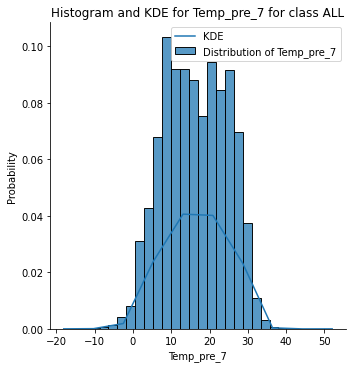

In [21]:
x = np.linspace(min_amount, max_amount, num=10)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 30)

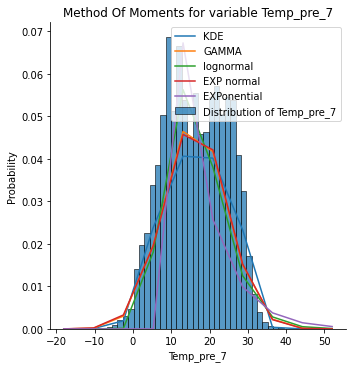

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9802331738970627, pvalue=1.8213751702525523e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.1406958890715173, pvalue=0)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9985196486153751, pvalue=1.0108300357991907e-28), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3187985242781655, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9780370069104998, pvalue=5.223303303615567e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.1196935749430543, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)


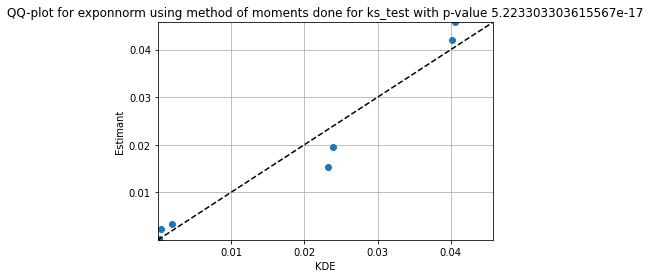

In [22]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1647: RuntimeWarning: overflow encountered in exp
  return np.exp(self._logpdf(x, K))


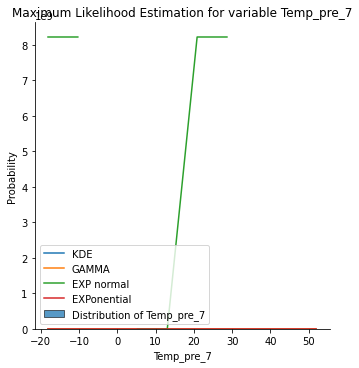

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9783965157803024, pvalue=4.428615704315273e-17), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.123146709386758, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=inf, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=inf, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5900550526351207, pvalue=0.000759753298182156), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.9138510276206188, pvalue=0.002912303801040128)


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1658: RuntimeWarning: overflow encountered in exp
  return _norm_cdf(x) - np.exp(logprod)


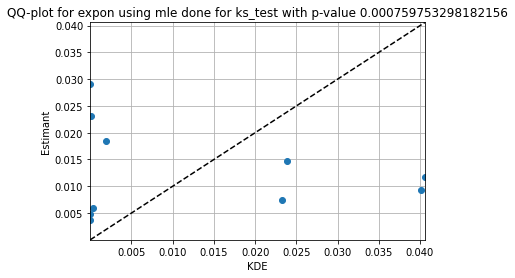

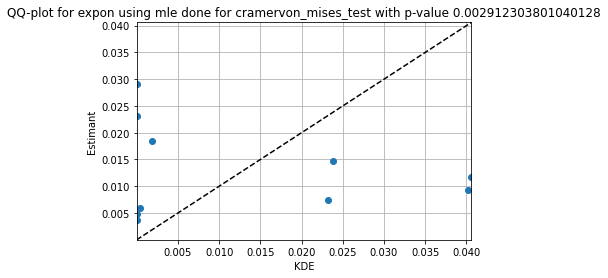

In [23]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[1.09391157e-02 1.67016712e+01 9.03463189e+00]
[ 5.28616401 26.52012703  8.10892718]


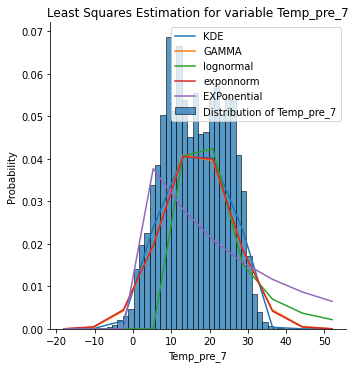

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9709364493620718, pvalue=8.600361312080061e-16), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.052487460804383, pvalue=0)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.968199137683139, pvalue=2.115528892596726e-15), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.0268137412448115, pvalue=0)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3333333333333335, pvalue=0)


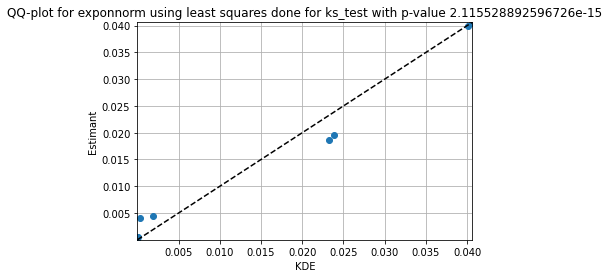

In [24]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

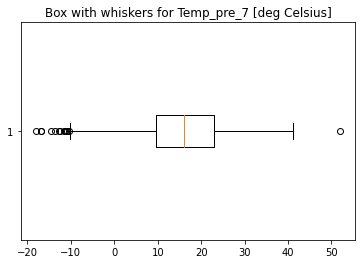

In [25]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} [deg Celsius]')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()